# Ляра Максим Витальевич - решение тестового задания на позицию Data scientist

## Импорт библиотек, данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, RepeatedKFold
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
data = pd.read_csv('test.csv', sep=';')
data

,Week,Sales,"Россия 1, ТВ Рейтинги","Домашний, ТВ Рейтинги","НТВ, ТВ Рейтинги","Первый Канал, ТВ Рейтинги","Пятый Канал, ТВ Рейтинги","ТВ Центр, ТВ Рейтинги","ТВ-3, ТВ Рейтинги","Рен ТВ, ТВ Рейтинги","Звезда, ТВ Рейтинги","Нишевые каналы, ТВ Рейтинги","Реклама в прессе, руб.","Конкурент1, ТВ Рейтинги","Конкурент2, ТВ Рейтинги","Конкурент3, ТВ Рейтинги","Конкурент4, ТВ Рейтинги","Цена бренда, руб.","Средняя цена в категории, руб."
0,04.01.2010,7092.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,104
1,11.01.2010,8664.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,100
2,18.01.2010,7526.0,0,0,0,0,0,0,0,0,0,0,50,0,0,0,0,53,97
3,25.01.2010,9165.0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,0,55,103
4,01.02.2010,8713.0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,52,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,26.08.2013,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,152
191,02.09.2013,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96,152
192,09.09.2013,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97,152
193,16.09.2013,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,157


In [3]:
data.dtypes

Week                               object
Sales                             float64
Россия 1, ТВ Рейтинги               int64
Домашний, ТВ Рейтинги               int64
НТВ, ТВ Рейтинги                    int64
Первый Канал, ТВ Рейтинги           int64
Пятый Канал, ТВ Рейтинги            int64
ТВ Центр, ТВ Рейтинги               int64
ТВ-3, ТВ Рейтинги                   int64
Рен ТВ, ТВ Рейтинги                 int64
Звезда, ТВ Рейтинги                 int64
Нишевые каналы, ТВ Рейтинги         int64
Реклама в прессе, руб.              int64
Конкурент1, ТВ Рейтинги             int64
Конкурент2, ТВ Рейтинги             int64
Конкурент3, ТВ Рейтинги             int64
Конкурент4, ТВ Рейтинги             int64
Цена бренда, руб.                   int64
Средняя цена в категории, руб.      int64
dtype: object

In [4]:
data.isna().sum()

Week                               0
Sales                             39
Россия 1, ТВ Рейтинги              0
Домашний, ТВ Рейтинги              0
НТВ, ТВ Рейтинги                   0
Первый Канал, ТВ Рейтинги          0
Пятый Канал, ТВ Рейтинги           0
ТВ Центр, ТВ Рейтинги              0
ТВ-3, ТВ Рейтинги                  0
Рен ТВ, ТВ Рейтинги                0
Звезда, ТВ Рейтинги                0
Нишевые каналы, ТВ Рейтинги        0
Реклама в прессе, руб.             0
Конкурент1, ТВ Рейтинги            0
Конкурент2, ТВ Рейтинги            0
Конкурент3, ТВ Рейтинги            0
Конкурент4, ТВ Рейтинги            0
Цена бренда, руб.                  0
Средняя цена в категории, руб.     0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,156.0,10028.660256,2071.714208,6077.0,8399.0,9744.0,11290.0,15715.0
"Россия 1, ТВ Рейтинги",195.0,12.569231,21.652101,0.0,0.0,0.0,36.0,100.0
"Домашний, ТВ Рейтинги",195.0,1.830769,4.125240,0.0,0.0,0.0,0.0,22.0
"НТВ, ТВ Рейтинги",195.0,1.451282,7.189012,0.0,0.0,0.0,0.0,50.0
"Первый Канал, ТВ Рейтинги",195.0,6.328205,17.396379,0.0,0.0,0.0,0.0,74.0
"Пятый Канал, ТВ Рейтинги",195.0,1.158974,4.694849,0.0,0.0,0.0,0.0,29.0
"ТВ Центр, ТВ Рейтинги",195.0,0.671795,2.748003,0.0,0.0,0.0,0.0,18.0
"ТВ-3, ТВ Рейтинги",195.0,0.400000,1.972491,0.0,0.0,0.0,0.0,12.0
"Рен ТВ, ТВ Рейтинги",195.0,0.225641,1.624668,0.0,0.0,0.0,0.0,15.0
"Звезда, ТВ Рейтинги",195.0,0.292308,1.468463,0.0,0.0,0.0,0.0,9.0


In [6]:
data.head(10)

,Week,Sales,"Россия 1, ТВ Рейтинги","Домашний, ТВ Рейтинги","НТВ, ТВ Рейтинги","Первый Канал, ТВ Рейтинги","Пятый Канал, ТВ Рейтинги","ТВ Центр, ТВ Рейтинги","ТВ-3, ТВ Рейтинги","Рен ТВ, ТВ Рейтинги","Звезда, ТВ Рейтинги","Нишевые каналы, ТВ Рейтинги","Реклама в прессе, руб.","Конкурент1, ТВ Рейтинги","Конкурент2, ТВ Рейтинги","Конкурент3, ТВ Рейтинги","Конкурент4, ТВ Рейтинги","Цена бренда, руб.","Средняя цена в категории, руб."
0,04.01.2010,7092.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,104
1,11.01.2010,8664.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,100
2,18.01.2010,7526.0,0,0,0,0,0,0,0,0,0,0,50,0,0,0,0,53,97
3,25.01.2010,9165.0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,0,55,103
4,01.02.2010,8713.0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,52,101
5,08.02.2010,7489.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,101
6,15.02.2010,8595.0,46,10,0,0,0,0,0,0,0,0,6,0,0,0,0,53,104
7,22.02.2010,7798.0,43,10,0,0,0,0,0,0,0,0,0,0,0,0,0,53,100
8,01.03.2010,9154.0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,52,105
9,08.03.2010,8317.0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,52,103


## Корреляционный анализ:

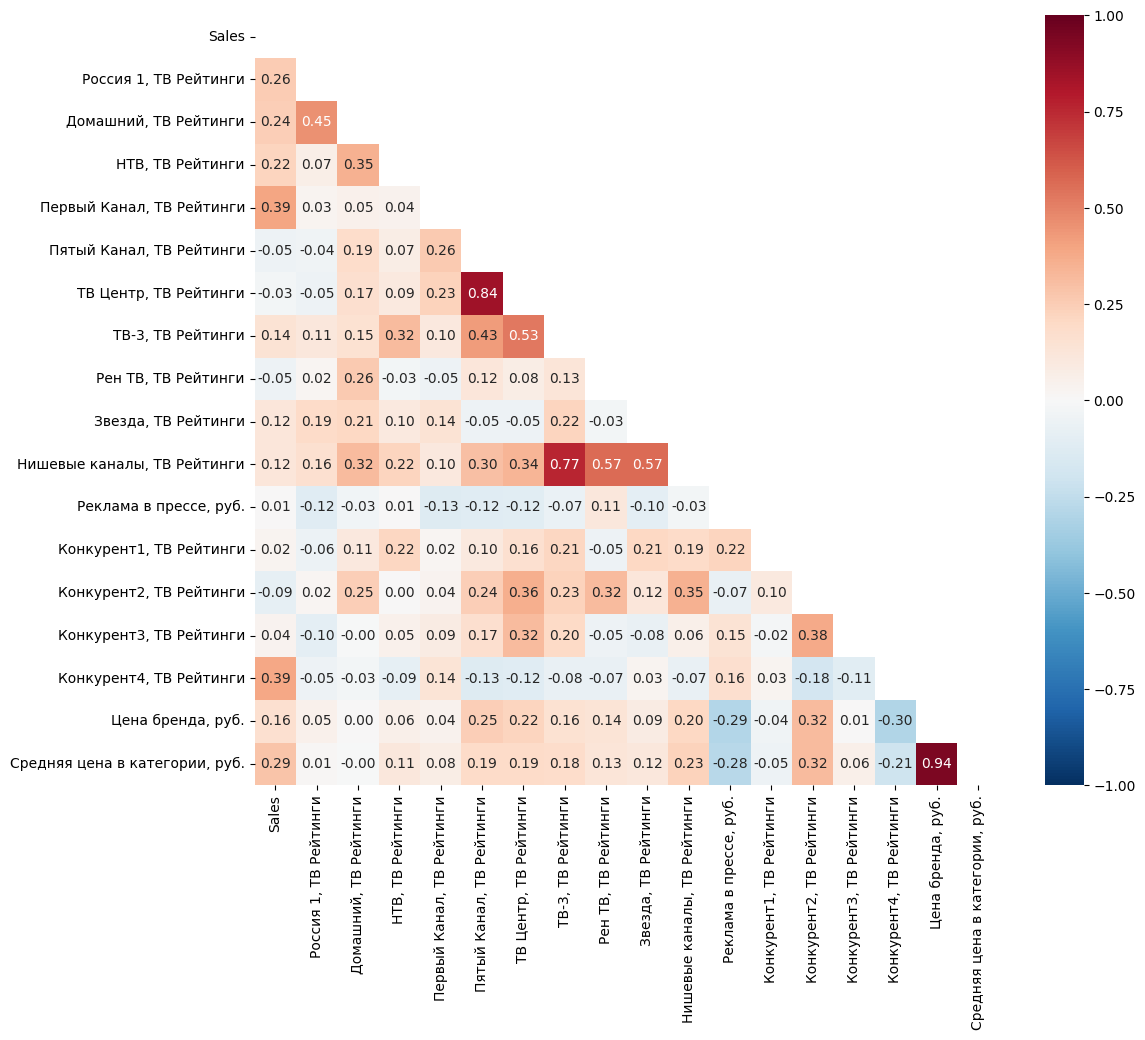

In [7]:
# Вычисление матрицы корреляции
corr_df = data.drop(columns='Week').corr()

# Создание маски для верхнего треугольника
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# Настройка цветовой палитры
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Построение графика
plt.figure(figsize=(12, 10), dpi=100)
sns.heatmap(
    corr_df, 
    mask=mask,  # Применение маски
    cmap='RdBu_r', 
    vmin=-1, vmax=1, 
    center=0, 
    annot=True, 
    fmt=".2f",  # Округление значений для улучшения читаемости
    xticklabels=corr_df.columns, 
    yticklabels=corr_df.columns
)
plt.show()


- **'ТВ Центр, ТВ Рейтинги'** имеет высокую корреляцию с:
  - **'Пятый Канал, ТВ Рейтинги'** (0.84)
  - **'ТВ-3, ТВ Рейтинги'** (0.43)

  **Решение:** Удалить более общую переменную **'ТВ Центр, ТВ Рейтинги'** для снижения риска мультиколлинеарности.

- **"Цена бренда, руб."** имеет высокую корреляцию с **"Средняя цена в категории, руб."** (0.94)

  **Решение:** Создать новый признак — **"Отношение цены к цене конкурентов"** — как соотношение этих признаков, затем удалить оба исходных признака для снижения риска мультиколлинеарности.

- **'Нишевые каналы, ТВ Рейтинги'** имеет высокую корреляцию с:
  - **'ТВ-3, ТВ Рейтинги'** (0.77)
  - **'ТВ Рейтинги	Звезда'** (0.57)
  - **'Звезда, ТВ Рейтинги'** (0.57)

  **Решение:** Удалить более общую переменную **'Нишевые каналы, ТВ Рейтинги'** для снижения риска мультиколлинеарности.


In [8]:
# Создаем копию данных и рассчитываем отношение цены к цене конкурентов
df = data.copy()
df["Отношение цены к цене конкурентов"] = df['Цена бренда, руб.'] / df['Средняя цена в категории, руб.']
df = df.drop(columns=['ТВ Центр, ТВ Рейтинги', 'Нишевые каналы, ТВ Рейтинги', 
                      'Цена бренда, руб.', 'Средняя цена в категории, руб.']).copy()

# Преобразуем столбец с датами
df['Week'] = pd.to_datetime(df['Week'], format='%d.%m.%Y')

# Отбираем данные за 2013 год и оставляем остальные
mask_2013 = ((df['Week'] >= '2012-12-31') & (df['Week'] <= '2013-09-29'))
df_2013 = df[mask_2013].copy()
df = df[~mask_2013].copy()

## Построение моделей

### 1 задание - понедельный прогноз продаж на 2013г и его обоснование

Выбрал Lasso регрессию так как, хоть и была проведена работа по борьбе с мультиколлинеарностью, но всё ещё есть много коррелирующих между собой признаков по ТВ каналам \
Для теста брал 0.3 от всей выборки, при этом не перемешивал данные при разделении на трейн и тест, так как работаю с временным рядом \
StandartScaler нужно применять т.к. применяю Lasso. К сожалению, признаки потеряют интерпретируемость, поэтому для получения информации о коэффициентах отдельно построю обычную множественную линейную регрессию


RMSE на тестовой выборке: 2493.11


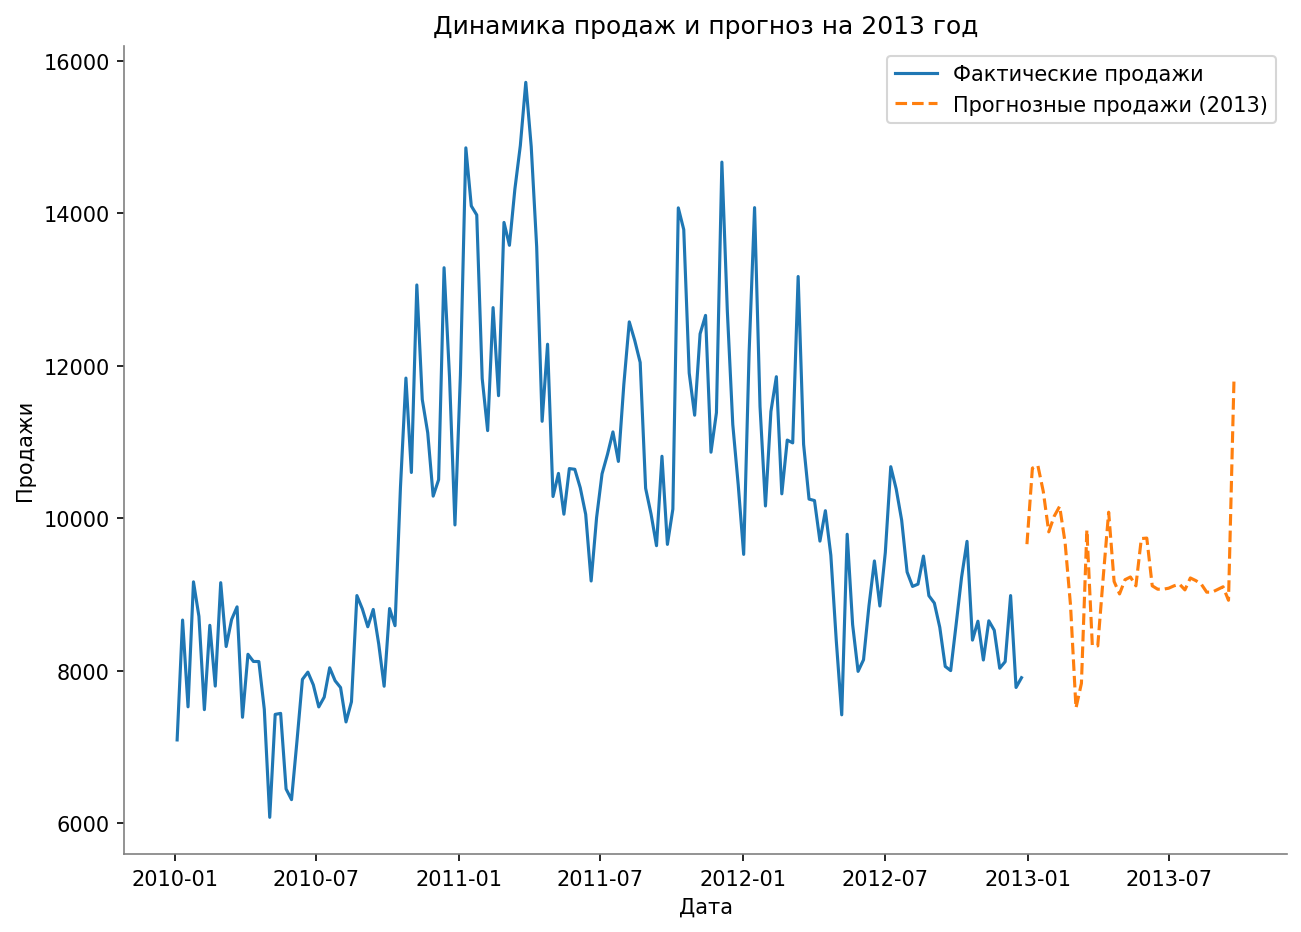

In [19]:
# Подготовка признаков и целевой переменной
X = df.drop(columns=['Week', 'Sales'])
y = df['Sales']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Настройка модели Lasso с Pipeline для стандартизации данных
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(alpha=10))
# Обучение модели на тренировочной выборке
lasso_pipeline.fit(X_train, y_train)
# Вывод метрики точности на тестовой выборке
y_pred = lasso_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE на тестовой выборке: {rmse:.2f}')

# создание пайплайна для обучения на всех данных
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(alpha=10))
# обучение на всей выборке
lasso_pipeline.fit(X, y)

# Прогноз на 2013 год
y_pred_lasso = lasso_pipeline.predict(df_2013[X.columns])

# График прогноза на 2013 год
plt.figure(figsize=(10, 7), dpi=150)
plt.plot(df['Week'], df['Sales'], label='Фактические продажи')
plt.plot(df_2013['Week'], y_pred_lasso, label='Прогнозные продажи (2013)', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['left'].set_color('gray')
plt.title('Динамика продаж и прогноз на 2013 год')
plt.show()

прогноз с использованием Lasso, StandartScaler

In [10]:
y_pred_lasso

array([ 9658.97368749, 10655.57444925, 10691.290836  , 10349.51451122,
        9820.29519174, 10024.71980053, 10155.2563271 ,  9682.23287379,
        8857.43966873,  7510.47563784,  7834.15318752,  9846.30325778,
        8331.33360881,  8325.4453366 ,  9222.78679819, 10078.20219681,
        9170.23562493,  9006.71805334,  9193.26454081,  9228.62206821,
        9112.61240313,  9732.56376382,  9738.83126773,  9112.61240313,
        9068.48668603,  9068.48668603,  9081.07238654,  9112.61240313,
        9135.11071284,  9059.49147534,  9215.87411616,  9181.00726464,
        9135.11071284,  9029.73597656,  9029.73597656,  9064.86088865,
        9099.98580075,  8923.46633806, 11799.46743846])

при построении модели признаки имели следующую значимость и отклонения:

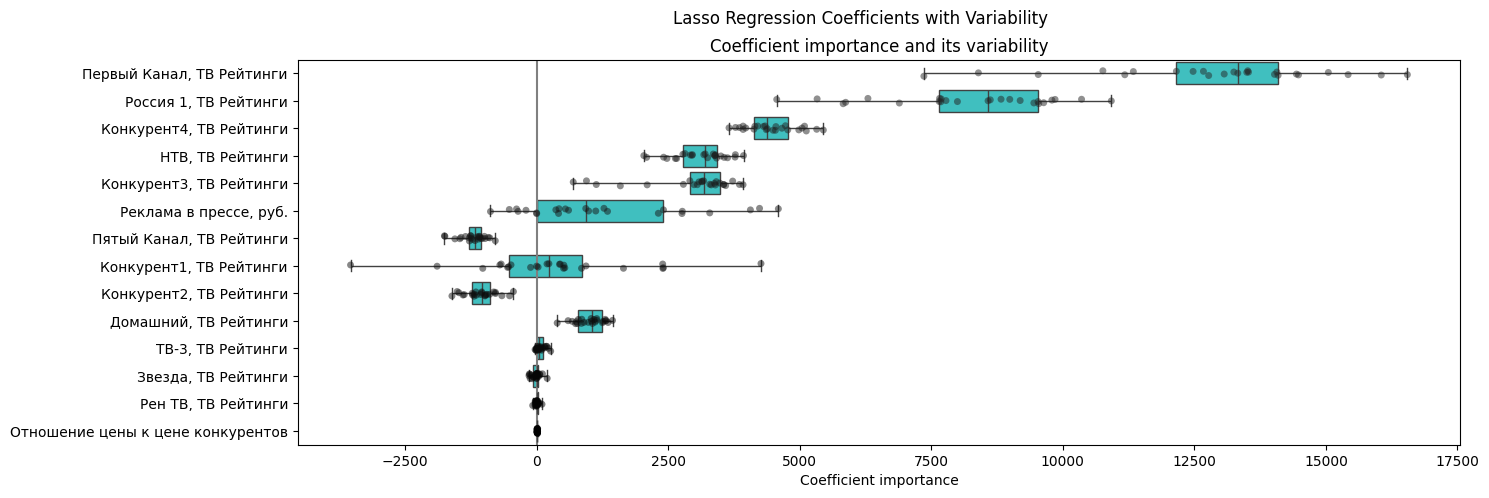

In [11]:
# Кросс-валидация с RepeatedKFold для оценки коэффициентов модели
cv = RepeatedKFold(n_splits=5, n_repeats=5)
cv_model = cross_validate(
    lasso_pipeline,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=-1,
)

# Получение коэффициентов и создание DataFrame для визуализации
coefs = pd.DataFrame(
    [
        est[-1].coef_ * X.iloc[train_idx].std(axis=0)
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(X, y))
    ],
    columns=X.columns,
)

# Сортировка коэффициентов по убыванию (сначала по абсолютной величине)
coefs_sorted = coefs.abs().mean(axis=0).sort_values(ascending=False)

# Визуализация важности коэффициентов и их вариабельности
plt.figure(figsize=(15, 5))
sns.stripplot(data=coefs[coefs_sorted.index], orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs[coefs_sorted.index], orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.suptitle("Lasso Regression Coefficients with Variability")
plt.show()


Наибольшее влияние на определение целевой переменной оказали признаки "Россия 1, ТВ Рейтинги" и "Первый Канал, ТВ Рейтинги"\
На прогноз модели не оказали влияние признаки "ТВ-3, ТВ Рейтинги", "Звезда, ТВ Рейтинги", "Рен ТВ, ТВ Рейтинги", "Отношение цены к цене конкурентов"

### 3 задание - график динамики целевого показателя, дополненный графиком оценок целевого показателя, полученных с помощью модели

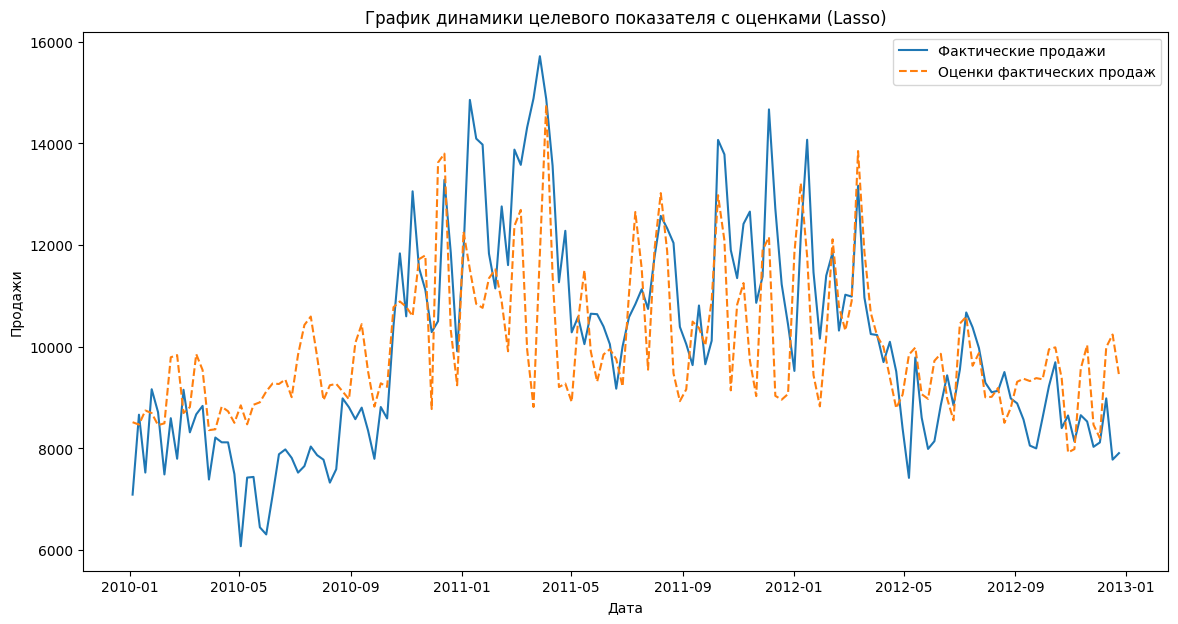

In [12]:
# Оценка на всей выборке и построение графика
y_est = lasso_pipeline.predict(X)
plt.figure(figsize=(14, 7))
plt.plot(df['Week'], y, label='Фактические продажи')
plt.plot(df['Week'], y_est, label='Оценки фактических продаж', linestyle='--')
# plt.plot(df['Week'], y - y_est, label='Остатки модели')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.title('График динамики целевого показателя с оценками (Lasso)')
plt.show()

### 2 задание - количественная оценка влияния рекламной активности на ТВ

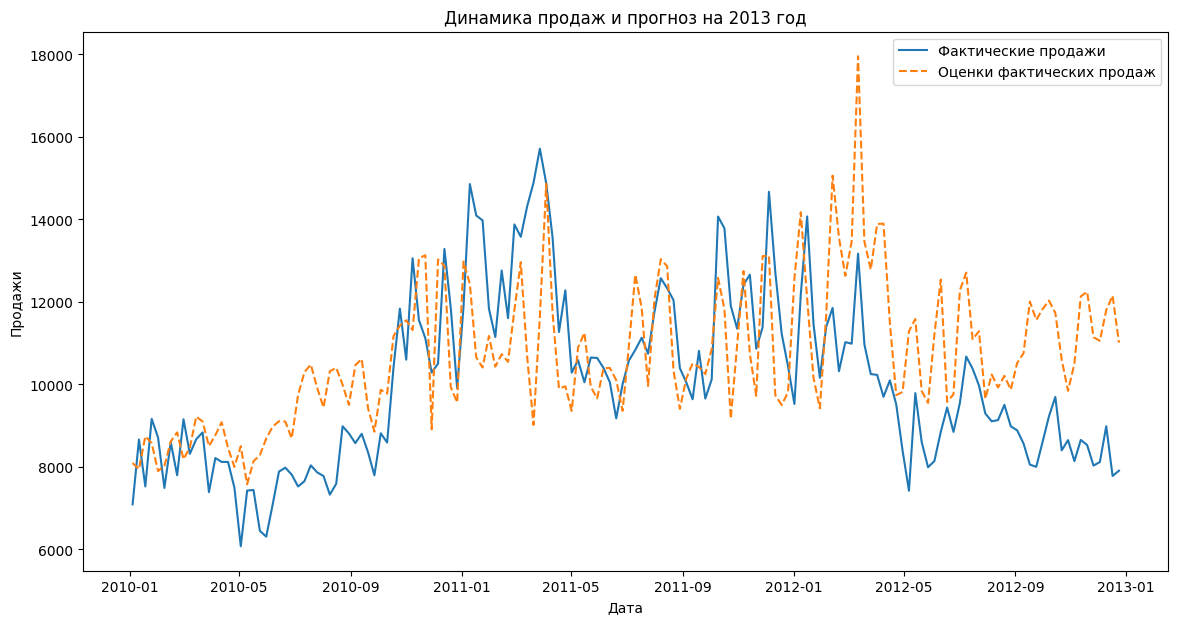

Описательные статистики коэффицентов рекламной активности на ТВ:



,count,mean,std,min,25%,50%,75%,max
0,8.0,31.8,60.0,-49.0,0.0,14.1,54.0,135.9



Коэффициенты влияния отдельных ТВ каналов:


Россия 1, ТВ Рейтинги         28.2
Домашний, ТВ Рейтинги        -49.0
НТВ, ТВ Рейтинги             100.6
Первый Канал, ТВ Рейтинги     38.5
Пятый Канал, ТВ Рейтинги      -0.0
ТВ-3, ТВ Рейтинги              0.0
Рен ТВ, ТВ Рейтинги            0.0
Звезда, ТВ Рейтинги          135.9
dtype: float64


Сумма всех коэффициентов:


254.2

In [13]:
# Добавляем константу для модели регрессии
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Обучение многофакторной регрессионной модели
model = sm.OLS(y_train, X_train).fit()

y_est = model.predict(sm.add_constant(X))
# График динамики продаж и оценок
plt.figure(figsize=(14, 7))
plt.plot(df['Week'], y, label='Фактические продажи')
plt.plot(df['Week'], y_est, label='Оценки фактических продаж', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.title('Динамика продаж и прогноз на 2013 год')
plt.show()

# Прогноз на 2013 год
X_forecast = sm.add_constant(df_2013[X.columns])
y_pred_statsmodels = model.predict(X_forecast)

# Оценка влияния рекламной активности на ТВ
tv_ratings_vars = [
    'Россия 1, ТВ Рейтинги', 'Домашний, ТВ Рейтинги', 'НТВ, ТВ Рейтинги',
    'Первый Канал, ТВ Рейтинги', 'Пятый Канал, ТВ Рейтинги', 
    'ТВ-3, ТВ Рейтинги', 'Рен ТВ, ТВ Рейтинги', 
    'Звезда, ТВ Рейтинги'
]

# Извлекаем коэффициенты модели
tv_effects = model.params[tv_ratings_vars].round(1)

# Описательные статистики
tv_effects_summary = tv_effects.describe().round(1).to_frame().T  # Преобразуем в DataFrame с одной строкой

# Сумма всех коэффициентов
tv_effects_sum = float(tv_effects.sum().round(1))

# Вывод результатов
print("Описательные статистики коэффицентов рекламной активности на ТВ:\n")
display(tv_effects_summary)

print("\nКоэффициенты влияния отдельных ТВ каналов:")
display(tv_effects)

print("\nСумма всех коэффициентов:")
display(tv_effects_sum)



### 4 задание - содержательная интерпретация полученным результатам и итоговой модели, рекомендации по совершенствованию модели и дополнительные факторы, которые можно было бы использовать для улучшения объясняющей силы и прогностической способности модели

In [14]:
# Получаем статистику модели
summary_df = pd.DataFrame({
    'Коэффициенты': model.params.round(2),
    'Стандартные ошибки': model.bse.round(2),
    't-статистика': model.tvalues.round(2),
    'p-значения': model.pvalues.round(2)
})

# Выводим DataFrame
display(summary_df)


,Коэффициенты,Стандартные ошибки,t-статистика,p-значения
const,-864.67,2735.08,-0.32,0.75
"Россия 1, ТВ Рейтинги",28.23,10.25,2.76,0.01
"Домашний, ТВ Рейтинги",-49.00,64.60,-0.76,0.45
"НТВ, ТВ Рейтинги",100.62,36.88,2.73,0.01
"Первый Канал, ТВ Рейтинги",38.52,10.08,3.82,0.00
"Пятый Канал, ТВ Рейтинги",-0.00,0.00,-2.80,0.01
"ТВ-3, ТВ Рейтинги",0.00,0.00,3.16,0.00
"Рен ТВ, ТВ Рейтинги",0.00,0.00,3.07,0.00
"Звезда, ТВ Рейтинги",135.90,199.44,0.68,0.50
"Реклама в прессе, руб.",7.03,8.88,0.79,0.43


## Интерпретация полученных результатов модели

### 1. Коэффициенты:

- **Константа (-864.67)**: Это значение показывает, что при отсутствии всех факторов (например, рекламных кампаний на ТВ и в прессе) базовый уровень продаж препарата составляет -864.67 единиц. Хотя это значение не имеет практического смысла, оно полезно для проверки общей структуры модели.
  
- **Каналы ТВ:**
  - **Россия 1, ТВ Рейтинги (28.23)**: Положительный коэффициент и статистически значимый (p-value = 0.01). Это говорит о том, что рост количества просмотров рекламы на канале "Россия 1" повышает продажи препарата на 28.23 единицы за каждую дополнительную единицу увеличения показателей ТВ рейтингов.
  - **Домашний, ТВ Рейтинги (-49.00)**: Отрицательный коэффициент, но статистически незначимый (p-value = 0.45), что указывает на отсутствие влияния канала "Домашний" на продажи.
  - **НТВ, ТВ Рейтинги (100.62)**: Положительный и статистически значимый коэффициент (p-value = 0.01), что говорит о положительном влиянии рекламы на этом канале на продажи.
  - **Первый Канал, ТВ Рейтинги (38.52)**: Положительный коэффициент с высокой значимостью (p-value = 0.00), что подтверждает значительное влияние рекламы на этом канале.
  - **Пятый Канал, ТВ Рейтинги (0.00)**: Коэффициент равен 0, но статистически значимый (p-value = 0.01), что указывает на отсутствие влияния этого канала на продажи.
  - **ТВ-3, ТВ Рейтинги (0.00)**: Похожая ситуация с ТВ-3, коэффициент равен 0, но статистически значимый.
  - **Рен ТВ, ТВ Рейтинги (0.00)**: Коэффициент равен 0, но статистически значимый, что подтверждает отсутствие влияния на продажи.
  - **Звезда, ТВ Рейтинги (135.90)**: Положительный коэффициент, но незначимый (p-value = 0.50), что свидетельствует о слабом или несущественном влиянии этого канала на продажи.
  
- **Реклама в прессе (7.03)**: Положительный коэффициент, но статистически незначимый (p-value = 0.43), что указывает на слабое или несущественное влияние на продажи от рекламы в прессе.
  
- **Конкуренты:**
  - **Конкурент1 (ТВ Рейтинги -0.63, p-value = 0.96)**: Незначительный отрицательный эффект, статистически незначимый.
  - **Конкурент2 (ТВ Рейтинги 3.04, p-value = 0.96)**: Незначительный положительный эффект, статистически незначимый.
  - **Конкурент3 (ТВ Рейтинги 60.11, p-value = 0.07)**: Положительный, но статистически незначимый (p-value близко к 0.05), что может быть показателем слабого влияния этого конкурента на продажи.
  - **Конкурент4 (ТВ Рейтинги 129.24, p-value = 0.00)**: Положительный и значимый (p-value = 0.00), что означает, что этот конкурент оказывает сильное влияние на продажи.
  
- **Отношение цены к цене конкурентов (16939.15)**: Очень высокий коэффициент и статистически значимый (p-value = 0.00), что говорит о том, что когда цена препарата значительно выше цены конкурентов, это сильно снижает продажи, или наоборот, если цена ниже, то продажи растут.

### 2. Пояснение значений коэффициентов:

- Каналы с положительными коэффициентами (например, Россия 1, НТВ, Первый Канал) имеют заметное влияние на продажи препарата. Это может означать, что реклама на этих каналах наиболее эффективна для стимулирования спроса.
- Каналы с нулевыми коэффициентами (ТВ-3, Рен ТВ и др.) не оказывают существенного воздействия на продажи. Вероятно, это связано с тем, что их аудитория или рейтинги не обеспечивают достаточного охвата или вовлеченности.
- Реклама в прессе, несмотря на положительный коэффициент, не имеет значимого эффекта на продажи, что может свидетельствовать о малой эффективности этого канала в контексте продаж данного продукта.
- Конкуренты с высокими коэффициентами (например, Конкурент4) и значимостью также играют роль в определении продаж, что может указывать на важность их активности в ТВ-рекламе.
- Отношение цены к цене конкурентов оказывает значительное влияние на продажи: если цена препарата значительно ниже, чем у конкурентов, это может стимулировать спрос.

## Рекомендации по улучшению модели:

1. **Добавление дополнительных факторов:**
   - **Цены конкурентов**: Возможно, стоит учитывать абсолютное значение цен конкурента, так как если цены конкурента и цены рассматриваемого продукта выросли одновременно, то это никак не повлияет на соотношение, однако продажи могут упасть, но это увеличит риск получения мультиколлинеарности, поэтому лучше учитывать что-то по типу инфляции
   - **Сезонность и тренды**: Можнл учитывать сезонные колебания спроса и тренды в покупательском поведении, так как это может значительно повлиять на модель.
   - **Социальные медиа**: Влияние рекламы на платформах социальных медиа может быть существенным, и его можно добавить в модель.
   - **Промо-акции**: Учет скидок, акций или специальных предложений, которые могут повлиять на спрос.
   - **Реклама в интернете**: Влияние рекламы через онлайн-каналы, такие как YouTube, может быть значительным.

2. **Модели с нелинейными эффектами**:
   - Возможно, стоит рассмотреть более сложные модели, такие как **деревья решений** или **градиентный бустинг**, которые могут более эффективно выявлять нелинейные зависимости между переменными и продажами. Но в классе линейных моделей Lasso - хорошее решение

3. **Параметры временного ряда**:
   - Включение временных лагов для рекламных данных может помочь в модели, где прошлые рекламные кампании влияют на продажи в будущем. Это может быть достигнуто через использование **параметров временных рядов** или **машинного обучения с временной зависимостью**.

4. **Проверка мультиколлинеарности**:
   - Можно проверить мультиколлинеарность между независимыми переменными, особенно в отношении различных каналов ТВ. Высокая корреляция может привести к проблемам в интерпретации коэффициентов. Для этого можно использовать критерии, такие как **VIF (Variance Inflation Factor)**.


P.S. если модель для прогнозирования и получения коэффициентов должны совпадать, то можно использовать и обычную линейную регрессию. На тесте RMSE не сильно хуже. Но для прогноза (1 задание) я всё же выбрал Lasso регрессию с препроцессингом в виде StandartScaler. \
Для отображения оценок фактических продаж (3 задание), аналогично, можно использовать обычную множественную линейную регрессию

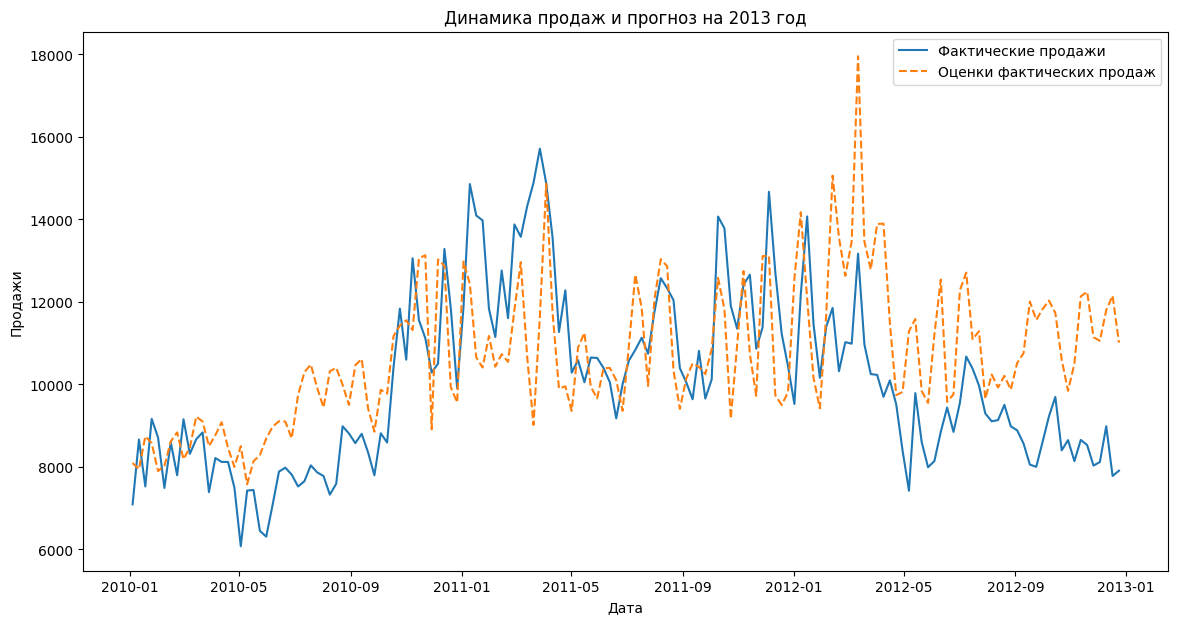

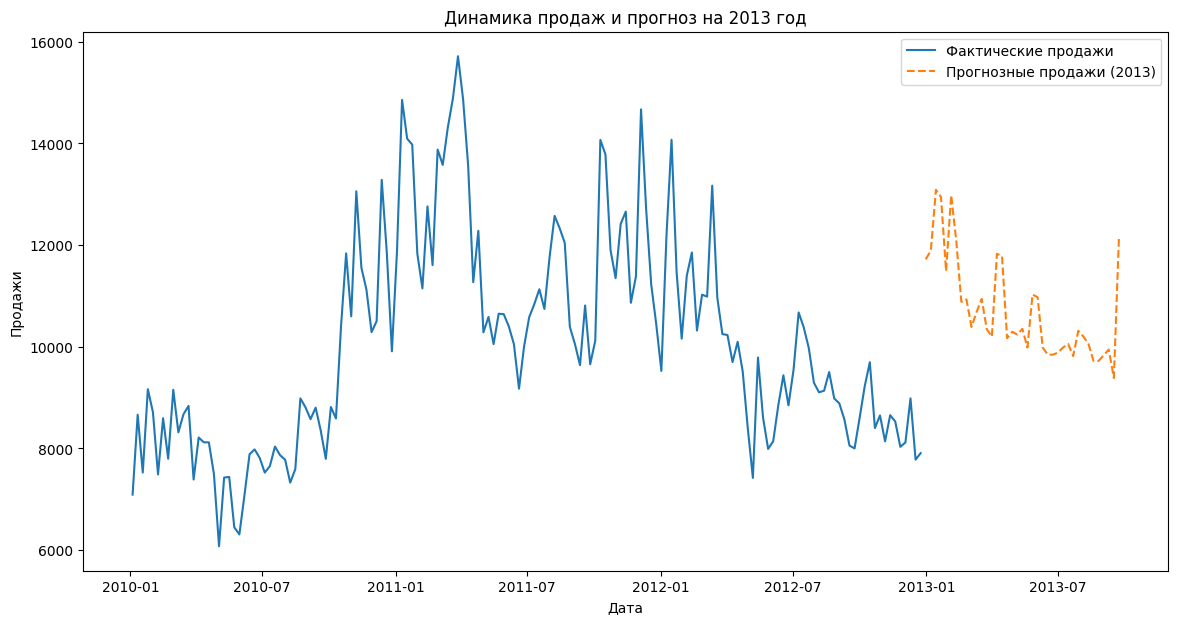

RMSE на тестовой выборке: 2585.83


In [15]:
# Добавляем константу для модели регрессии
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Обучение многофакторной регрессионной модели
model = sm.OLS(y_train, X_train).fit()

y_est = model.predict(sm.add_constant(X))
# График динамики продаж и оценок
plt.figure(figsize=(14, 7))
plt.plot(df['Week'], y, label='Фактические продажи')
plt.plot(df['Week'], y_est, label='Оценки фактических продаж', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.title('Динамика продаж и прогноз на 2013 год')
plt.show()

# Прогноз на 2013 год
X_forecast = sm.add_constant(df_2013[X.columns])
y_pred_statsmodels = model.predict(X_forecast)

# График динамики продаж и прогнозных значений
plt.figure(figsize=(14, 7))
plt.plot(df['Week'], df['Sales'], label='Фактические продажи')
plt.plot(df_2013['Week'], y_pred_statsmodels, label='Прогнозные продажи (2013)', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.title('Динамика продаж и прогноз на 2013 год')
plt.show()

# Вывод метрики точности на тестовой выборке
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE на тестовой выборке: {rmse:.2f}')


Прогнозы модели statsmodels (обычный линрег)

In [16]:
y_pred_statsmodels

156    11718.699383
157    11892.103418
158    13087.490856
159    12944.440328
160    11488.988202
161    12983.821622
162    12083.251060
163    10883.491413
164    10932.237942
165    10390.202644
166    10684.864715
167    10941.594063
168    10346.473395
169    10198.700010
170    11828.907989
171    11783.313183
172    10168.067082
173    10294.728048
174    10241.131538
175    10353.311310
176     9985.244348
177    11027.404044
178    10974.280447
179     9985.244348
180     9845.245507
181     9845.245507
182     9885.176495
183     9985.244348
184    10056.625336
185     9816.706162
186    10312.865542
187    10202.242551
188    10056.625336
189     9722.300096
190     9722.300096
191     9833.741843
192     9945.183589
193     9385.135577
194    12162.535174
dtype: float64